In [ ]:
# 복습용 : " 샘플링 편향을 직접 만들고-> 해결하기"
# 목표: 처음 35개/나머지 14개로 자르면 왜 score=0이 나오는지를 재현하고,
# np.random.shuffle + 인덱싱으로 해결해서 score가 정상화되는 걸 확인.

In [ ]:
# 해야 할 것
# 1. 리스트 슬라이싱으로 편향 분할 만들기 → kn.score() 확인
# 2. np.random.seed(42) + np.random.shuffle(index)로 섞기
# 3. 섞인 index로 train_input/train_target, test_input/test_target 만들기
# 4. 산점도(plt.scatter)로 분포 확인
# 5. 다시 학습/평가 → score 확인
# 6. kn.predict([[25,150]]) 결과 확인하고, 왜 그렇게 나올 수 있는지 2~3줄로 설명

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #K-최근접

# 1) 데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7]

In [2]:
fish_data = [[l,w]for l,w in zip(fish_length,fish_weight)]
fish_target =[1] * 35 + [0] *14
# 1: 도미, 0: 빙어

kn = KNeighborsClassifier()

In [4]:
# 2) 편향분할 앞 35개 훈련 뒤 14개 테스트
train_input =fish_data[:35]
train_target =fish_target[:35]
test_input =fish_data[35:]
test_target =fish_target[35:]

# 여기서 score 출력해보기
# kn.fit(train_input, train_target)
# print(kn.score(test_input, test_target))

In [5]:
# 3) numpy 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [7]:
# 4) 섞어서 분할
np.random.seed(42)
index =np.arange(len(input_arr))
np.random.shuffle(index)

#index를 이용해 35개/14개로 나누기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input  = input_arr[index[35:]]
test_target = target_arr[index[35:]]

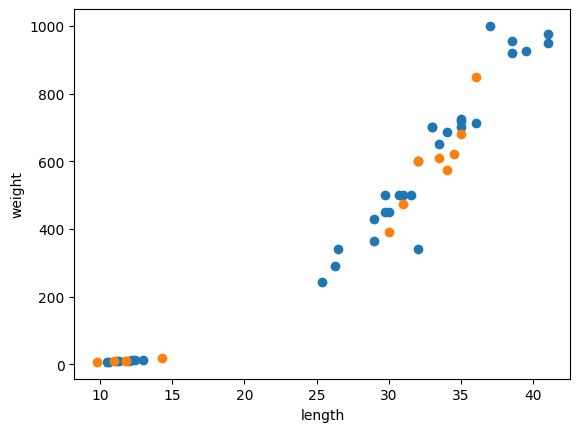

In [8]:
# 5) 산점도로 확인
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [9]:
# 6) 학습/평가
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

1.0


In [10]:
# 7) 새 샘플 예측
print(kn.predict([[25, 150]]))

[0]
